# 6.5.1 Unsupervised Machine Learning - Clustering

## Contents List: 

1) Import Data and Libraries
2) Elbow Technique
3) k-Means Clustering

## 1) Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Ensures graphs are displayed in notebook without the need to call

%matplotlib inline

In [3]:
# define path
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6'

In [4]:
# Import original data set "dairy_wrangled.csv"
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

In [5]:
df.shape

(4325, 23)

In [6]:
df.head()

,Unnamed: 0,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,0,Telangana,310.84,96,Medium,2/17/22,Ice Cream,Dodla Dairy,222.40,85.72,...,12/27/21,1/21/22,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,1,Uttar Pradesh,19.19,44,Large,12/1/21,Milk,Amul,687.48,42.61,...,10/3/21,10/25/21,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,2,Tamil Nadu,581.69,24,Medium,2/28/22,Yogurt,Dodla Dairy,503.48,36.50,...,1/14/22,2/13/22,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,3,Telangana,908.00,89,Small,6/9/19,Cheese,Britannia Industries,823.36,26.52,...,5/15/19,7/26/19,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,4,Maharashtra,861.95,21,Medium,12/14/20,Buttermilk,Mother Dairy,147.77,83.85,...,10/17/20,10/28/20,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [7]:
# Drop column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

## 3) Elbow Technique

In [8]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
# Select only numeric columns
df_n = df.select_dtypes(include=['number'])

In [10]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_n).score(df_n) for i in range(len(kmeans))] 

score

/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

[-2946354159218.1284,
 -1108190442640.421,
 -703603789108.752,
 -529778514254.21466,
 -400377461443.2805,
 -329280484304.97485,
 -273170022172.8687,
 -240277068503.54953,
 -212383911915.2428]

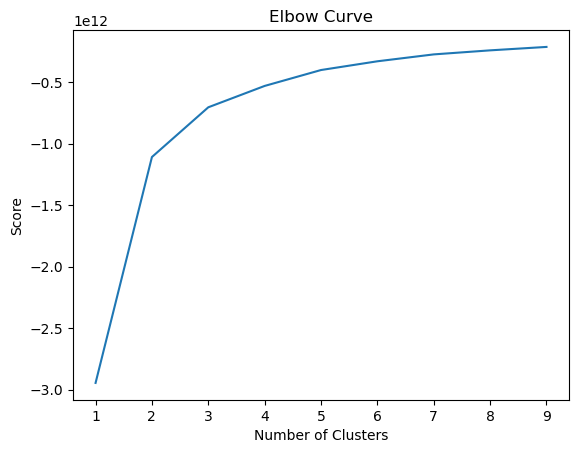

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Optimal count for clusters is 3 (where the curve begins to straighten out

## 3) k-Means Clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_n)

/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
df_n['clusters'] = kmeans.fit_predict(df_n)

/Users/carolinelasersohn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df_n.head()

,Total Land Area (acres),Number of Cows,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),clusters
0,310.84,96,222.40,85.72,19064.1280,25,7,82.24,575.68,215,19.55,64.03,1
1,19.19,44,687.48,42.61,29293.5228,22,558,39.24,21895.92,129,43.17,181.10,2
2,581.69,24,503.48,36.50,18377.0200,30,256,33.81,8655.36,247,15.10,140.83,1
3,908.00,89,823.36,26.52,21835.5072,72,601,28.92,17380.92,222,74.50,57.68,2
4,861.95,21,147.77,83.85,12390.5145,11,145,83.07,12045.15,2,76.02,33.40,1


In [16]:
df_n['clusters'].value_counts()

clusters
1    2281
2    1383
0     661
Name: count, dtype: int64

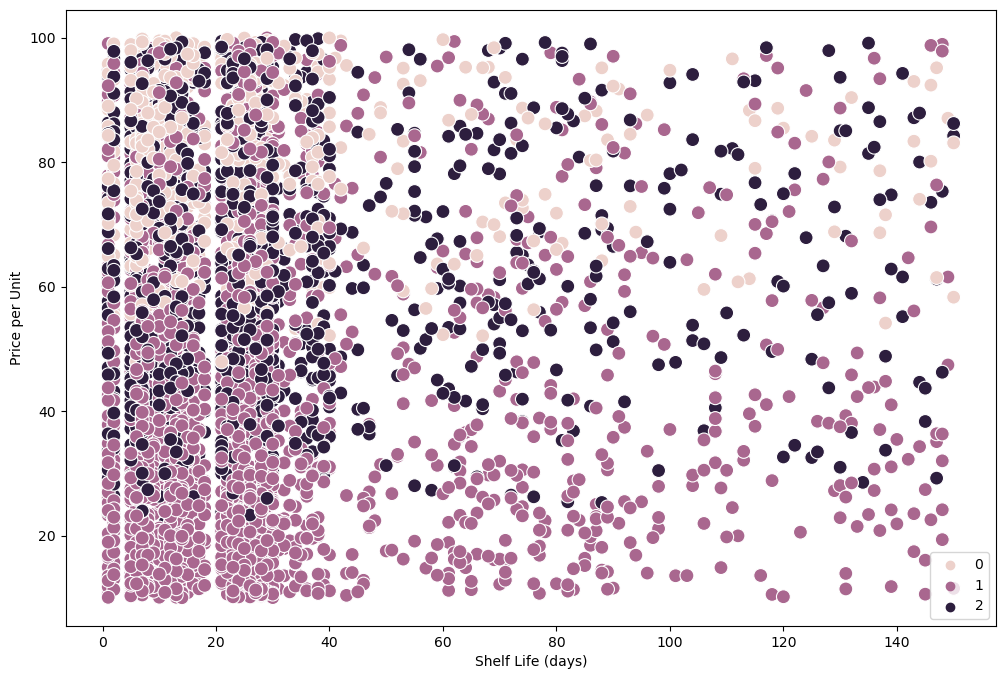

In [17]:
# Plot the clusters for the "Price per Unit" and "Shelf Life (days)" variables.

cluster_ppu_sl = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['Shelf Life (days)'], y=df_n['Price per Unit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Shelf Life (days)')
plt.ylabel('Price per Unit') 
plt.show()

In [18]:
cluster_ppu_sl.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_ppu_sl.png'))

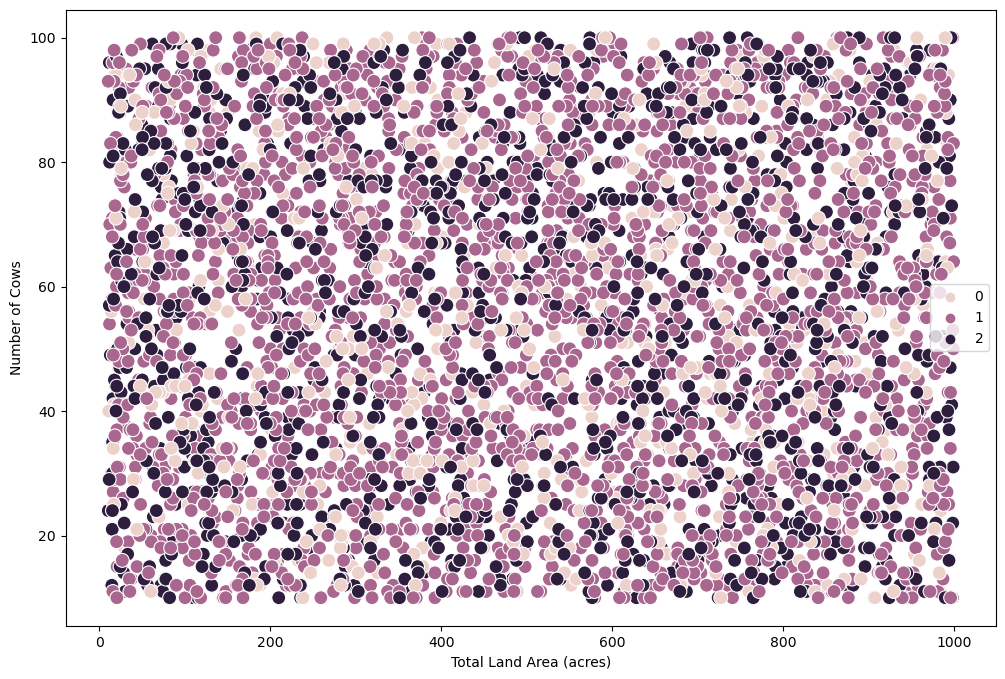

In [19]:
# Plot the clusters for the "Total Land Area (acres)" and "Number of Cows" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['Total Land Area (acres)'], y=df_n['Number of Cows'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Number of Cows') 
plt.show()

#### Variables "Total Land Area (acres)" and "Number of Cows" do not seem to have any sort of correlation pattern. 

In [20]:
df_n.loc[df_n['clusters'] == 2, 'cluster'] = 'dark purple'
df_n.loc[df_n['clusters'] == 1, 'cluster'] = 'purple'
df_n.loc[df_n['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df_n.groupby('cluster').agg({'Shelf Life (days)':['mean', 'median'], 
                         'Price per Unit':['mean', 'median']})

Shelf Life (days)        Price per Unit       
                         mean median           mean median
cluster                                                   
dark purple         29.731020   22.0      62.694953  61.13
pink                27.043873   17.0      80.831074  83.30
purple              29.365629   22.0      42.443104  36.44

#### The highest price per unit cluster (purple) also has the lowest shelf life median (27 days). The medium price per unit cluster (dark purple) and the lowest price per unit cluster (pink) both have similar median shelf lifes (29.7 days vs 29.3 days). This indicates there is a negative correlation between price per unit and shelf life when the price per unit is high or the shelf life is low.

In [22]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))